# Multicore Semantics & Programming
## Practical Report (Tim Harris section)
### Andrei-Vlad Badelita, Part II, Trinity College
### email: avb40@cam.ac.uk

#### Environment

- Hardware: Intel i7 7700HQ, 4 Cores, 2 HW Threads per Core
- Kernel: Linux 4.19.1
- Language: C++
- Compiler: GCC 8.2.1 with flags: pthreads, std=c++17

- TODO graphs
- TODO 500 word report on performance

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats

In [2]:
RUNS = 5
THREADS = 16

In [3]:
def plotfile(filename):
    file = open(filename, "r")
    
    lines = file.readlines()
    assert(len(lines) == RUNS * THREADS)

    xs = []
    ys = []
    yerr = [[], []]
    for i in range(THREADS):
        results = [ float(lines[i * RUNS + j]) for j in range(RUNS) ]
        mn = min(results)
        mx = max(results)
        av = stats.mean(results)
        xs.append(i + 1)
        ys.append(av)
        yerr[0].append(av - mn)
        yerr[1].append(mx - av)

    xs = np.array(xs)
    ys = np.array(ys)
    yerr = np.array(yerr)
    
#     fig = plt.figure(figsize=[15,15])
#     plt.xticks(xs)
    plt.errorbar(xs, ys, yerr=yerr, capsize=5, label=filename)
#     plt.show()

In [4]:
# plotfile("spin.log")

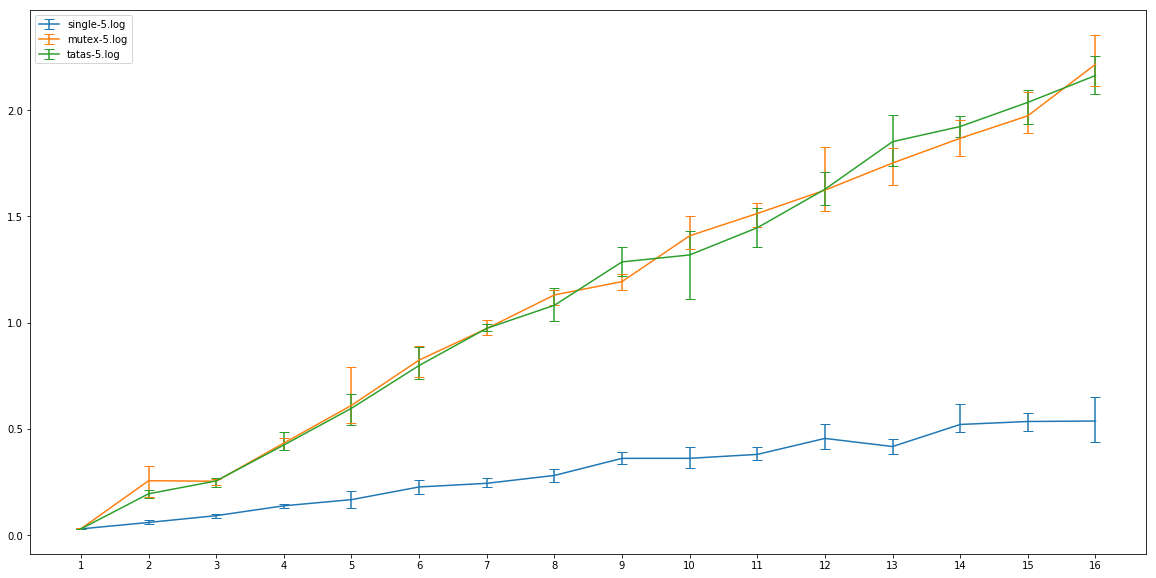

In [7]:
plt.figure(figsize=[20,10])
plt.xticks(np.arange(1, THREADS+1))

plotfile("single-5.log")
plotfile("mutex-5.log")
plotfile("tatas-5.log")
# plotfile("rw-5.log")

plt.legend()
plt.show()

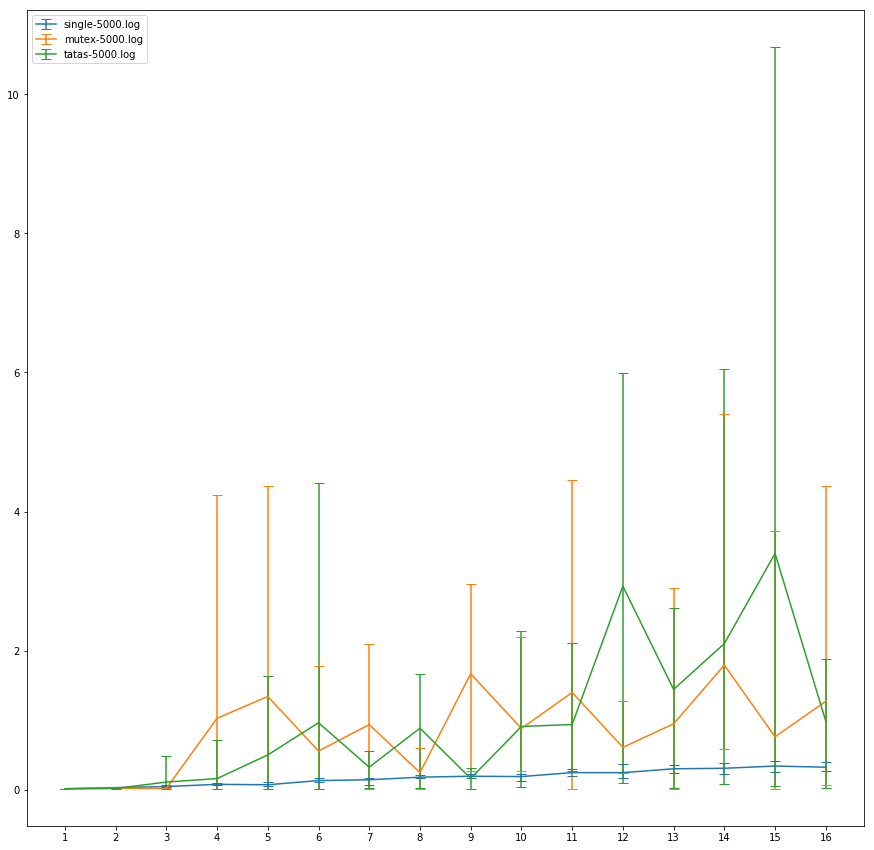

In [9]:
plt.figure(figsize=[15,15])
plt.xticks(np.arange(1, THREADS+1))

plotfile("single-5000.log")
plotfile("mutex-5000.log")
plotfile("tatas-5000.log")
# plotfile("rw-5.log")

plt.legend()
plt.show()